# Data Exploration on COVID-19 Cases and Deaths in the US States
In this assignment, I import a dataset that contains the number of COVID-19 cases and deaths measured over time in each US state. I view the data, explore the dataset properties, filter the data, and plot the number of times states have measured over 200,000 COVID-19 cases.

## Importing the data & basic data exploration

In [1]:
import geopandas as gpd

I imported the module geopandas which will allow me to import a variety of spatial data formats and map plotting features.

In [2]:

covid = gpd.read_file('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

I imported the dataset I selected for the assignment, which is a .csv of US COVID19 cases and deaths in each state over time

In [3]:
covid.head(10)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,geometry
0,05/04/2020,KY,5245,5245,0,115,0,261,261,0,8,0,05/05/2020 05:25:08 PM,Agree,Agree,None
1,12/08/2020,OK,205999,171497,34502,0,0,1752,1680,72,0,0,12/09/2020 02:45:40 PM,Agree,Agree,None
2,08/21/2020,MD,103523,,,624,0,3685,3546,139,11,1,08/22/2020 02:21:09 PM,N/A,Agree,None
3,04/09/2020,MA,18941,,,2374,,503,,,70,,04/08/2020 04:22:39 PM,Agree,Agree,None
4,06/25/2020,NE,18346,,,125,0,260,,,3,0,06/26/2020 07:18:27 PM,Not agree,Not agree,None
5,02/24/2020,CA,10,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Not agree,Not agree,None
6,11/14/2020,VA,201961,183455,18506,1161,191,3800,3527,273,1,0,11/15/2020 03:12:13 PM,Agree,Agree,None
7,11/17/2020,DE,29755,28473,1282,203,11,742,652,90,3,0,11/18/2020 02:57:46 PM,Agree,Agree,None
8,08/17/2020,IL,209186,207854,1332,1773,0,7967,7756,211,12,0,08/18/2020 02:26:55 PM,Agree,Agree,None
9,11/01/2020,MI,197406,178180,19226,0,0,7699,7340,359,0,0,11/02/2020 02:53:09 PM,Agree,Agree,None


Above, I used the `.head(10)` command to show the first 10 rows of the dataframe.

In [4]:
covid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21360 entries, 0 to 21359
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   submission_date  21360 non-null  object  
 1   state            21360 non-null  object  
 2   tot_cases        21360 non-null  object  
 3   conf_cases       21360 non-null  object  
 4   prob_cases       21360 non-null  object  
 5   new_case         21360 non-null  object  
 6   pnew_case        21360 non-null  object  
 7   tot_death        21360 non-null  object  
 8   conf_death       21360 non-null  object  
 9   prob_death       21360 non-null  object  
 10  new_death        21360 non-null  object  
 11  pnew_death       21360 non-null  object  
 12  created_at       21360 non-null  object  
 13  consent_cases    21360 non-null  object  
 14  consent_deaths   21360 non-null  object  
 15  geometry         0 non-null      geometry
dtypes: geometry(1), object(15)
memor

I used the `.info()` command to look at the datatypes and non-null count of the colums in the dataset. The output above shows that all columns are of object datatypes and that for all 21,360 rows, there are values for each column.

In [5]:
covid.shape

(21360, 16)

Used the `.shape` command to look at how many rows (21,360) and columns (16) there are in the dataset.

## Looking at the 'state' column

In [6]:
state_count = covid['state'].value_counts()
state_count

GA     356
PA     356
AS     356
ME     356
DE     356
WI     356
NV     356
DC     356
VT     356
WV     356
AZ     356
CO     356
PR     356
WY     356
WA     356
IL     356
PW     356
KS     356
NJ     356
FL     356
MO     356
UT     356
MD     356
MN     356
OR     356
AK     356
AR     356
NH     356
LA     356
MA     356
FSM    356
NYC    356
SD     356
SC     356
NC     356
GU     356
ND     356
VI     356
MT     356
KY     356
TN     356
IA     356
NY     356
NE     356
RI     356
MS     356
OH     356
RMI    356
TX     356
OK     356
MI     356
VA     356
NM     356
MP     356
ID     356
IN     356
HI     356
CA     356
CT     356
AL     356
Name: state, dtype: int64

By using the `.value_counts()` command for the "state" column in the dataset, I found that each state was measured and appeared 356 times in the dataset.

In [7]:
california = covid[covid.state == 'CA']
california

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,geometry
5,02/24/2020,CA,10,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Not agree,Not agree,None
147,03/29/2020,CA,5739,,,480,,137,,,18,,03/28/2020 04:22:39 PM,Not agree,Not agree,None
158,07/25/2020,CA,445400,,,10066,0,8337,,,151,0,07/26/2020 03:17:16 PM,Not agree,Not agree,None
207,09/14/2020,CA,757778,,,2855,0,14385,,,56,0,09/15/2020 02:03:59 PM,Not agree,Not agree,None
229,05/08/2020,CA,62512,,,1898,0,2585,,,81,0,05/09/2020 09:26:08 PM,Not agree,Not agree,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17630,05/19/2020,CA,81795,,,1365,0,3334,,,32,0,05/20/2020 03:28:26 PM,Not agree,Not agree,None
17681,01/30/2020,CA,2,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Not agree,Not agree,None
17690,01/29/2020,CA,2,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Not agree,Not agree,None
17693,05/03/2020,CA,53616,,,1419,0,2215,,,44,0,05/04/2020 10:49:24 PM,Not agree,Not agree,None


Aboce, I filtered for a subset of the dataset by only viewing data for the state of California. By using brackets, I was able to only view the 356 rows that showed COVID-19 data for California.

In [8]:
california = california.reset_index()
california

,index,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,geometry
0,5,02/24/2020,CA,10,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Not agree,Not agree,None
1,147,03/29/2020,CA,5739,,,480,,137,,,18,,03/28/2020 04:22:39 PM,Not agree,Not agree,None
2,158,07/25/2020,CA,445400,,,10066,0,8337,,,151,0,07/26/2020 03:17:16 PM,Not agree,Not agree,None
3,207,09/14/2020,CA,757778,,,2855,0,14385,,,56,0,09/15/2020 02:03:59 PM,Not agree,Not agree,None
4,229,05/08/2020,CA,62512,,,1898,0,2585,,,81,0,05/09/2020 09:26:08 PM,Not agree,Not agree,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,17630,05/19/2020,CA,81795,,,1365,0,3334,,,32,0,05/20/2020 03:28:26 PM,Not agree,Not agree,None
352,17681,01/30/2020,CA,2,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Not agree,Not agree,None
353,17690,01/29/2020,CA,2,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Not agree,Not agree,None
354,17693,05/03/2020,CA,53616,,,1419,0,2215,,,44,0,05/04/2020 10:49:24 PM,Not agree,Not agree,None


Above, I coverted the filtered data for California into a dataframe. The output contains the 356 rows of data in the dataset named "california."

In [9]:
california['tot_cases'] = california['tot_cases'].astype(str).astype(int)

I converted the data of the "tot-cases" column from an object datatype to integer by using the `.astype()` command. 

In [10]:
california.dtypes

index                 int64
submission_date      object
state                object
tot_cases             int64
conf_cases           object
prob_cases           object
new_case             object
pnew_case            object
tot_death            object
conf_death           object
prob_death           object
new_death            object
pnew_death           object
created_at           object
consent_cases        object
consent_deaths       object
geometry           geometry
dtype: object

I used the `.dtypes` command to look at the data types for each column in order to check if the datatype for the "tot_cases" column successfully changed to int64.

In [11]:
california[california['tot_cases']>10000]

,index,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,geometry
2,158,07/25/2020,CA,445400,,,10066,0,8337,,,151,0,07/26/2020 03:17:16 PM,Not agree,Not agree,None
3,207,09/14/2020,CA,757778,,,2855,0,14385,,,56,0,09/15/2020 02:03:59 PM,Not agree,Not agree,None
4,229,05/08/2020,CA,62512,,,1898,0,2585,,,81,0,05/09/2020 09:26:08 PM,Not agree,Not agree,None
5,246,10/11/2020,CA,846579,,,3803,0,16564,,,64,0,10/12/2020 02:07:08 PM,Not agree,Not agree,None
6,353,07/03/2020,CA,248235,,,8040,0,6263,,,100,0,07/04/2020 03:30:31 PM,Not agree,Not agree,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,17537,01/03/2021,CA,2391261,,,45352,0,26538,,,181,0,01/04/2021 02:55:45 PM,Not agree,Not agree,None
349,17574,05/11/2020,CA,67939,,,1259,0,2770,,,25,0,05/12/2020 05:26:08 PM,Not agree,Not agree,None
350,17582,11/07/2020,CA,956957,,,5863,0,17939,,,73,0,11/08/2020 02:40:34 PM,Not agree,Not agree,None
351,17630,05/19/2020,CA,81795,,,1365,0,3334,,,32,0,05/20/2020 03:28:26 PM,Not agree,Not agree,None


I used brackets to extract the times CA measured more than 10,000 COVID-19 cases. 

## Plotting # of times states surpassed 200k total COVID cases

In [12]:
covid['tot_cases'] = covid['tot_cases'].astype(str).astype(int)


I converted the "tot-cases" column datatype from object to integer using the `.astype()` command.

In [13]:
covid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21360 entries, 0 to 21359
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   submission_date  21360 non-null  object  
 1   state            21360 non-null  object  
 2   tot_cases        21360 non-null  int64   
 3   conf_cases       21360 non-null  object  
 4   prob_cases       21360 non-null  object  
 5   new_case         21360 non-null  object  
 6   pnew_case        21360 non-null  object  
 7   tot_death        21360 non-null  object  
 8   conf_death       21360 non-null  object  
 9   prob_death       21360 non-null  object  
 10  new_death        21360 non-null  object  
 11  pnew_death       21360 non-null  object  
 12  created_at       21360 non-null  object  
 13  consent_cases    21360 non-null  object  
 14  consent_deaths   21360 non-null  object  
 15  geometry         0 non-null      geometry
dtypes: geometry(1), int64(1), object

Used the `.info()` command to view the datatypes for each column in the covid dataset and check if I had successfully converted the "tot_cases" column to an integer datatype.

In [14]:
above_200k = covid[covid['tot_cases'] > 200000]
above_200k

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,geometry
1,12/08/2020,OK,205999,171497,34502,0,0,1752,1680,72,0,0,12/09/2020 02:45:40 PM,Agree,Agree,None
6,11/14/2020,VA,201961,183455,18506,1161,191,3800,3527,273,1,0,11/15/2020 03:12:13 PM,Agree,Agree,None
8,08/17/2020,IL,209186,207854,1332,1773,0,7967,7756,211,12,0,08/18/2020 02:26:55 PM,Agree,Agree,None
19,12/11/2020,MD,232009,,,3538,0,5100,4937,163,36,0,12/12/2020 02:59:37 PM,N/A,Agree,None
21,11/12/2020,GA,416217,379873,36344,2802,265,8881,8403,478,548,478,11/13/2020 09:54:34 AM,Agree,Agree,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21211,09/23/2020,NC,200802,196486,4316,1101,123,3338,3315,23,52,0,11/13/2020 07:10:12 PM,Agree,Agree,None
21243,11/29/2020,MO,295933,,,3193,0,3823,,,6,0,11/30/2020 02:51:40 PM,Not agree,Not agree,None
21263,12/18/2020,MO,360330,,,3723,0,4853,,,19,0,12/19/2020 02:42:31 PM,Not agree,Not agree,None
21267,12/31/2020,MO,392570,,,3714,0,5519,,,28,0,01/01/2021 02:49:07 PM,Not agree,Not agree,None


Used brackets to extract all of the data for the times states measured over 200,000 COVID-19 cases and stored the data into the variable, "above_200k"

In [15]:
above_200k_states = above_200k['state']
above_200k_states

1        OK
6        VA
8        IL
19       MD
21       GA
         ..
21211    NC
21243    MO
21263    MO
21267    MO
21309    NC
Name: state, Length: 2924, dtype: object

Stored the column "state," which names all of the states in above_200k, in the variable, "above_200k_states."

In [16]:
above_200k_states_count = above_200k_states.value_counts()
above_200k_states_count

NYC    231
CA     200
TX     190
FL     190
GA     162
IL     152
AZ     138
NY     135
NJ     122
NC     111
TN     100
WI      81
OH      78
PA      76
MI      71
AL      67
IN      67
MO      67
MN      61
VA      60
LA      60
SC      54
MA      54
IA      53
CO      50
OK      44
MD      43
UT      41
KY      37
WA      30
KS      25
AR      24
NV      24
MS      21
CT       5
Name: state, dtype: int64

Used the command, `.value_counts()` to find out how many times each state appeared in above_200k_states and stored the counts in the variable, "above_200k_states_count"

In [17]:
above_200k_states_count = above_200k_states_count.reset_index()
above_200k_states_count

,index,state
0,NYC,231
1,CA,200
2,TX,190
3,FL,190
4,GA,162
5,IL,152
6,AZ,138
7,NY,135
8,NJ,122
9,NC,111


Used the `.reset_index()` command to convert the above_200k_states_count series into a dataframe.

In [18]:
above_200k_states_count.columns.to_list()

['index', 'state']

Used the `.to_list()` command to view the current columns as a list.

In [19]:
above_200k_states_count.columns = ['State', 'Count']

Renamed the columns by giving it a list of column names to represent the state and its corrresponding count.

In [20]:
above_200k_states_count

,State,Count
0,NYC,231
1,CA,200
2,TX,190
3,FL,190
4,GA,162
5,IL,152
6,AZ,138
7,NY,135
8,NJ,122
9,NC,111


Printed above_200k_states_count to view the dataset with the new column names

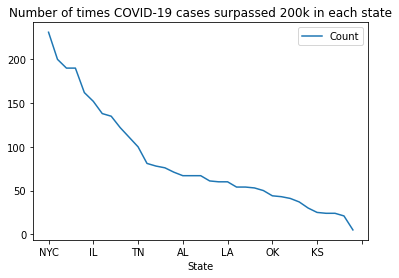

In [23]:
above_200k_states_count.plot(x = 'State', y = 'Count', title = 'Number of times COVID-19 cases surpassed 200k in each state')

Plotted the number of times COVID-19 cases surpassed 200k in each state using the `.plot()` command.

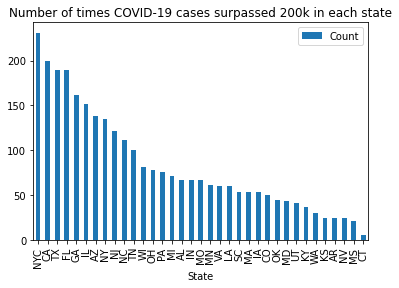

In [22]:
above_200k_states_count.plot.bar(x = 'State', y = 'Count', title = 'Number of times COVID-19 cases surpassed 200k in each state')

Used the `.plot.bar()` command to create a bar graph of the number of times COVID-19 cases surpassed 200k in each state. I also labeled the axis and title of the graph.